# Lista 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

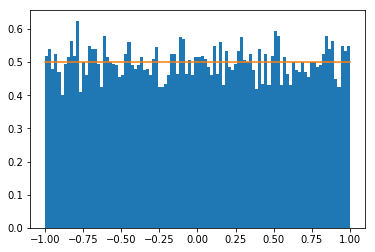

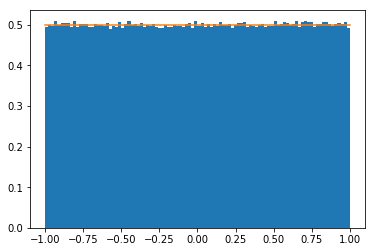

In [20]:
a1 = np.random.uniform(-1,1,10000)

plt.hist(a1,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5)
plt.show()

a2 = np.random.uniform(-1,1,1000000)

plt.hist(a2,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5)
plt.show()

In [21]:
x = np.linspace()

a1 = np.random.uniform(-1,1,10000)

plt.hist(a1,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5)
plt.show()

a2 = np.random.uniform(-1,1,1000000)

plt.hist(a2,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5)
plt.show()

TypeError: linspace() missing 2 required positional arguments: 'start' and 'stop'

## Zadanie 3

In [23]:
from sklearn import datasets
iris = datasets.load_iris() 

print(iris.data, iris.target, iris.feature_names, iris.target_names, sep='\n')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.